<a href="https://colab.research.google.com/github/balqozz/PCVK_2024/blob/main/Week6_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Praktikum

# 1.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2.imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import nath
import os
import glob

# 3.

<ipython-input-10-c499b38c2441>:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])


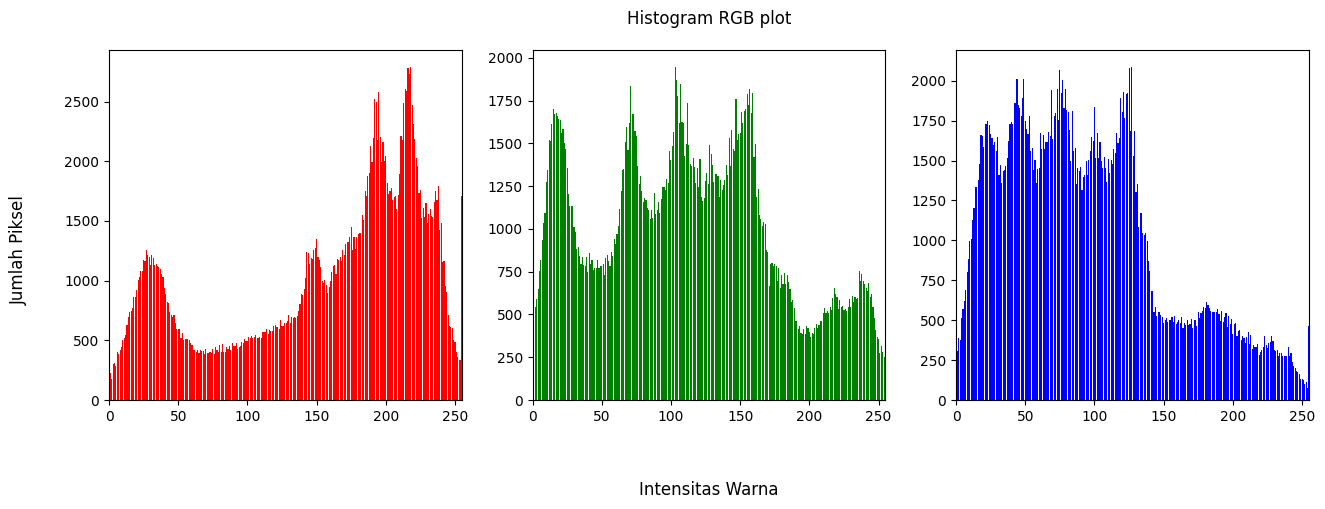

In [10]:
# Import library yang diperlukan
import cv2
import matplotlib.pyplot as plt

# Langkah 1: Input image
# Load gambar lena.jpg
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Langkah 2: Menghitung jumlah kemunculan setiap piksel warna (RGB) pada seluruh piksel citra yang ada
# Pisahkan citra menjadi tiga channel warna (B, G, R)
channels = cv2.split(image)

# Urutan channel baru: Red, Green, Blue
colors = ('r', 'g', 'b')  # Red di kiri, Green di tengah, Blue di kanan

# Langkah 3: Membuat histogram sebagai bar histogram
plt.figure(figsize=(15, 5))

for i, (channel, color, name) in enumerate(zip(channels[::-1], colors, channel_names)):  # Balikkan urutan channel untuk menukar posisi
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])

    # Ubah histogram ke format yang bisa ditampilkan dengan bar
    hist = hist.flatten()

    # Plot histogram dalam bentuk bar
    plt.subplot(1, 3, i+1)  # Membuat 3 plot untuk setiap channel
    plt.bar(range(256), hist, color=color)
    plt.xlim([0, 255])  # Rentang intensitas dari 0 hingga 255

# Tambahkan label umum untuk sumbu X dan Y
plt.suptitle('Histogram RGB plot')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)  # Menambah jarak bawah (bottom)

# Hanya satu label umum untuk sumbu X dan Y
plt.text(0.5, 0.02, 'Intensitas Warna', ha='center', va='center', fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.04, 0.5, 'Jumlah Piksel', ha='center', va='center', fontsize=12, rotation='vertical', transform=plt.gcf().transFigure)

# Menampilkan hasil histogram
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

# End

# 4.

<ipython-input-11-f74c12ed036f>:38: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])


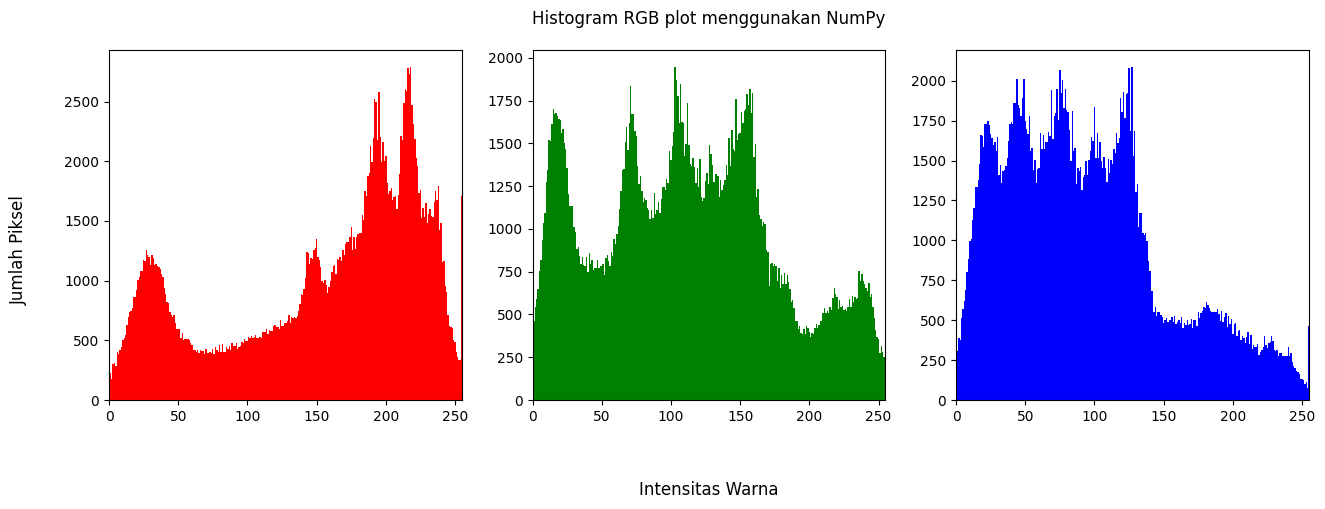

In [11]:
# Import library yang diperlukan
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Langkah 1: Input image
# Load gambar lena.jpg
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Langkah 2: Menghitung histogram menggunakan NumPy
# Pisahkan citra menjadi tiga channel warna (B, G, R)
channels = cv2.split(image)

# Urutan channel: Red, Green, Blue
colors = ('r', 'g', 'b')

# Langkah 3: Membuat histogram menggunakan NumPy
plt.figure(figsize=(15, 5))

for i, (channel, color) in enumerate(zip(channels[::-1], colors)):  # Balikkan urutan channel untuk menukar posisi
    # Menghitung histogram menggunakan NumPy
    hist, bins = np.histogram(channel.flatten(), bins=256, range=[0, 256])

    # Plot histogram dalam bentuk bar
    plt.subplot(1, 3, i+1)  # Membuat 3 plot untuk setiap channel
    plt.bar(bins[:-1], hist, color=color, width=1)
    plt.xlim([0, 255])  # Rentang intensitas dari 0 hingga 255

# Tambahkan label umum untuk sumbu X dan Y
plt.suptitle('Histogram RGB plot menggunakan NumPy')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)  # Menambah jarak bawah (bottom)

# Hanya satu label umum untuk sumbu X dan Y
plt.text(0.5, 0.02, 'Intensitas Warna', ha='center', va='center', fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.04, 0.5, 'Jumlah Piksel', ha='center', va='center', fontsize=12, rotation='vertical', transform=plt.gcf().transFigure)

# Menampilkan hasil histogram
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

# End


## Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

**OpenCV (`cv2.calcHist`)** dan **NumPy (`np.histogram`)** sama-sama digunakan untuk menghitung histogram distribusi intensitas warna pada citra. Meskipun keduanya menghasilkan grafik yang menunjukkan frekuensi piksel untuk setiap nilai intensitas (0-255), cara kerjanya berbeda.

- **OpenCV**: Fungsi `cv2.calcHist` dirancang khusus untuk pengolahan citra dan langsung bekerja dengan gambar dalam format OpenCV (BGR). Fungsi ini lebih efisien saat bekerja dengan gambar karena sudah dioptimalkan untuk keperluan pengolahan citra.
  
- **NumPy**: Fungsi `np.histogram` bersifat lebih umum, bekerja pada data numerik apa saja. Saat digunakan pada citra, NumPy tidak memiliki optimasi khusus untuk gambar seperti OpenCV, sehingga butuh sedikit pengaturan manual seperti pemisahan channel warna sebelum menghitung histogram.

Kedua metode biasanya memberikan hasil yang sangat mirip, namun ada kemungkinan sedikit perbedaan dalam detail teknis seperti jumlah bin atau penghitungan tepi histogram.

# 5.

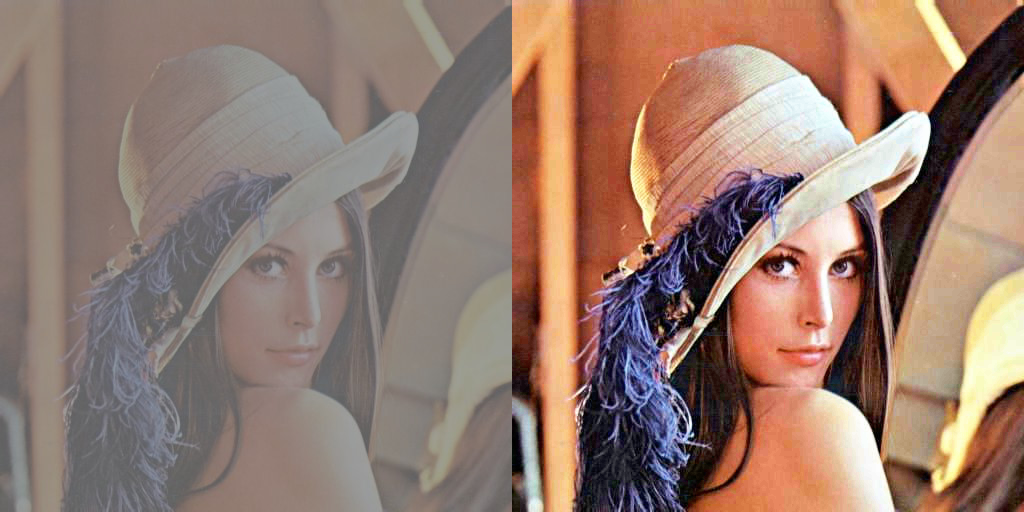

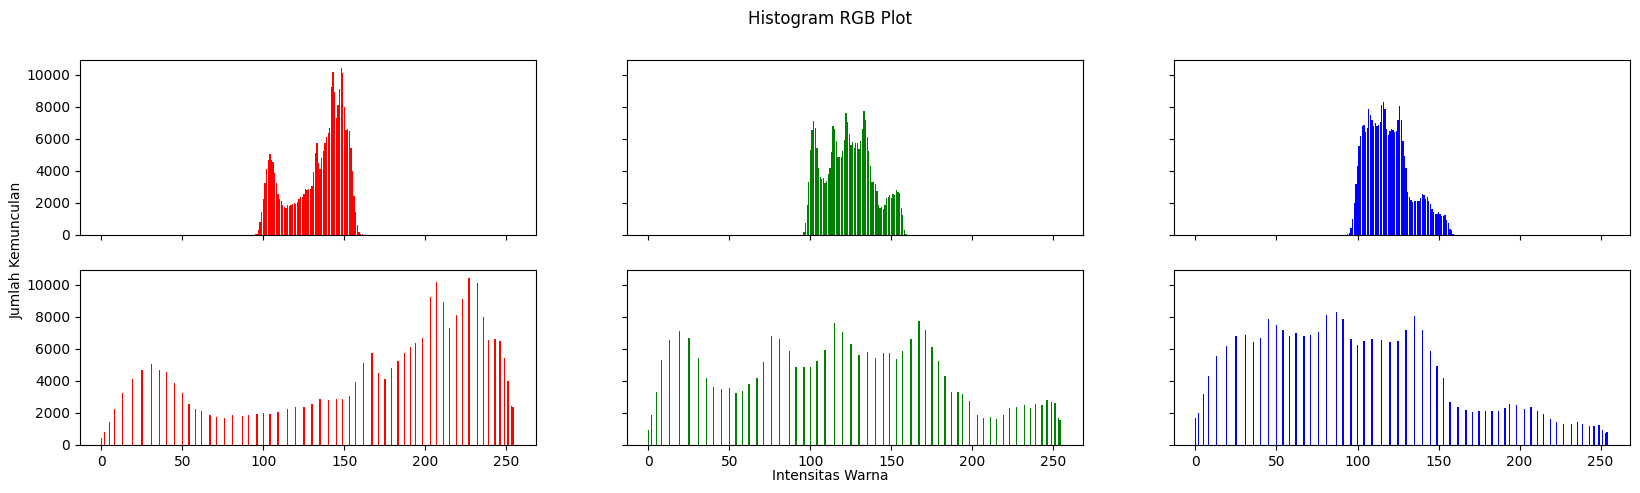

In [9]:
# Load the image
img1 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Function to calculate histogram of each color channel
def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))  # For storing histograms of R, G, B channels
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1  # Blue channel
            ax[1][img1[y][x][1]] += 1  # Green channel
            ax[2][img1[y][x][2]] += 1  # Red channel
    return ax

# Calculate original histogram
histo_asli = histog(img1)

# Convert image to a Numpy array
img_array = np.asarray(img1)

# Step 1: Normalize cumulative histogram
histogram_array = np.bincount(img_array.flatten(), minlength=256)
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels  # Normalize

# Cumulative histogram
chistogram_array = np.cumsum(histogram_array)

# Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Step 3: Apply the transformation to equalize the image
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array  # Equalized image

# Calculate histogram for equalized image
equal_histo = histog(img2)

# Concatenate the original and equalized images
final_frame = cv.hconcat((img1, img2))  # Concatenate horizontally
cv2_imshow(final_frame)  # Display the concatenated image

# Determine if the image is grayscale by checking if all channels are equal
blue, green, red = img1[:, :, 0], img1[:, :, 1], img1[:, :, 2]
isgrayimg = np.array_equal(blue, green) and np.array_equal(green, red)

names = np.arange(256)  # Intensity values
if not isgrayimg:
    # If the image is not grayscale, plot histograms for each color channel
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Plot original image histograms (R, G, B)
    axs[0, 0].bar(names, histo_asli[2], color='red')   # Red channel
    axs[0, 1].bar(names, histo_asli[1], color='green') # Green channel
    axs[0, 2].bar(names, histo_asli[0], color='blue')  # Blue channel

    # Plot equalized image histograms (R, G, B)
    axs[1, 0].bar(names, equal_histo[2], color='red')   # Red channel
    axs[1, 1].bar(names, equal_histo[1], color='green') # Green channel
    axs[1, 2].bar(names, equal_histo[0], color='blue')  # Blue channel
else:
    # If the image is grayscale, plot only grayscale histograms
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Plot original and equalized grayscale histograms
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')

plt.show()

# End

# 6.

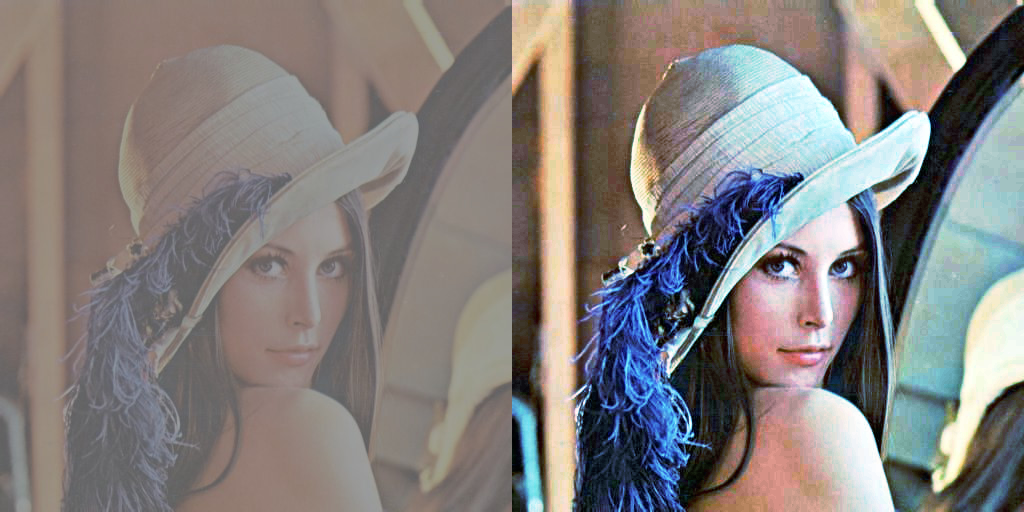

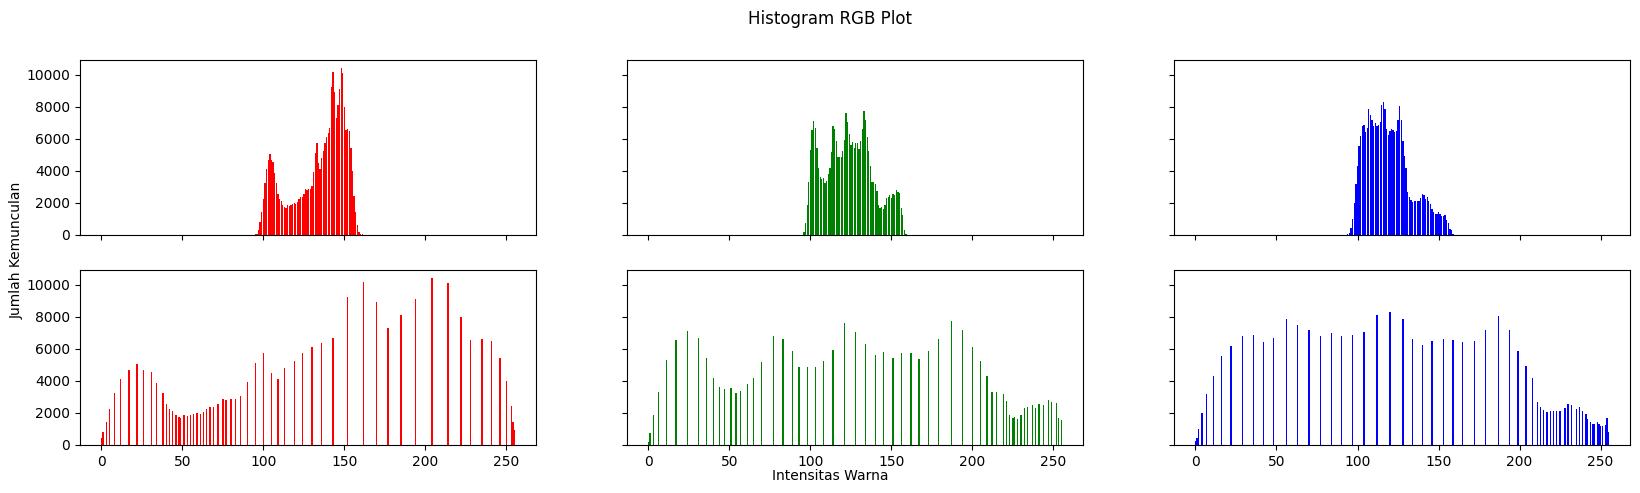

In [17]:
img1 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Split the image into its color channels
channels = cv.split(img1)

# Apply histogram equalization to each channel
eq_channels = []
for ch in channels:
    eq_channels.append(cv.equalizeHist(ch))

# Merge equalized channels back into an image
eq_image = cv.merge(eq_channels)

# Function to calculate histogram
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1  # Blue channel
            ax[1][img[y][x][1]] += 1  # Green channel
            ax[2][img[y][x][2]] += 1  # Red channel
    return ax

# Calculate histograms
histo_asli = histog(img1)
equal_histo = histog(eq_image)

# Concatenate original and equalized images for display
final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)  # Display the concatenated image

# Check if the image is grayscale
blue, green, red = img1[:, :, 0], img1[:, :, 1], img1[:, :, 2]
isgraying = np.array_equal(blue, green) and np.array_equal(green, red)

# Plot histograms
names = np.arange(256)
if not isgraying:
    # If the image is not grayscale, plot RGB histograms
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Plot original histograms (R, G, B)
    axs[0, 0].bar(names, histo_asli[2], color='red')   # Red channel
    axs[0, 1].bar(names, histo_asli[1], color='green') # Green channel
    axs[0, 2].bar(names, histo_asli[0], color='blue')  # Blue channel

    # Plot equalized histograms (R, G, B)
    axs[1, 0].bar(names, equal_histo[2], color='red')   # Red channel
    axs[1, 1].bar(names, equal_histo[1], color='green') # Green channel
    axs[1, 2].bar(names, equal_histo[0], color='blue')  # Blue channel
else:
    # If the image is grayscale, plot grayscale histograms
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Plot original and equalized grayscale histograms
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')

plt.show()

# End

## Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

Pendekatan histogram equalization dapat dilakukan secara manual atau menggunakan fungsi OpenCV `equalizeHist()`. Pada metode manual, histogram dihitung untuk setiap channel (merah, hijau, biru), diikuti dengan normalisasi dan penghitungan histogram kumulatif untuk menciptakan gambar yang di-equalize. Sementara itu, pendekatan OpenCV menggunakan fungsi tersebut pada setiap channel secara terpisah sebelum menggabungkannya kembali menjadi gambar.

Meskipun kedua metode menghasilkan gambar yang tampak mirip dan histogram yang menunjukkan distribusi lebih merata, hasilnya tidak akan sama persis karena perbedaan dalam algoritma yang diterapkan. Dengan demikian, meskipun kedua pendekatan meningkatkan kualitas gambar dan histogram, output akhir tetap akan memiliki perbedaan halus.

# 7.

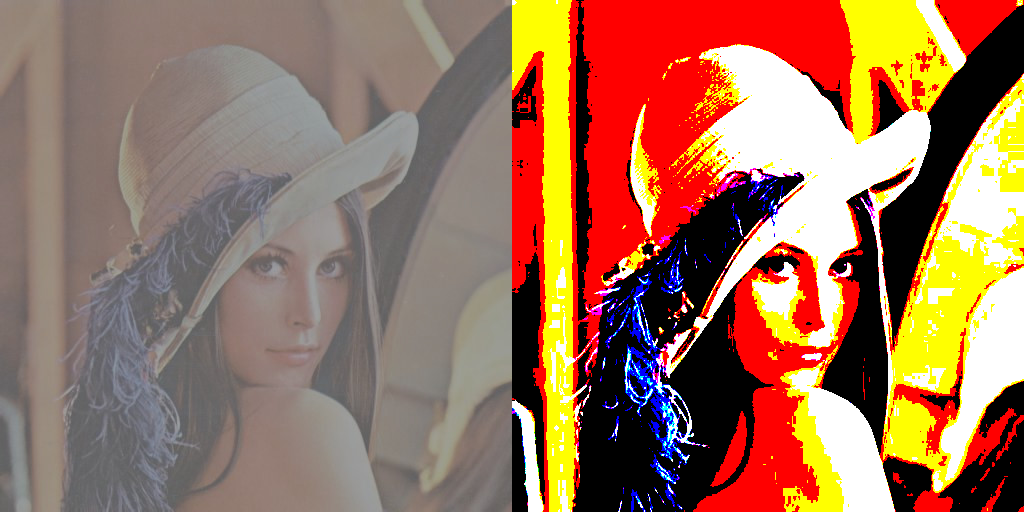

In [19]:
img_1 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

# End

# 8.

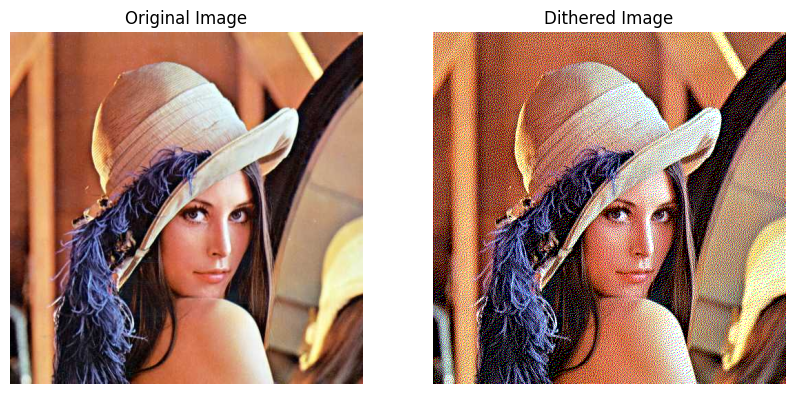

In [20]:
import cv2
# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Display the original and dithered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

def threshold(value):
    """Ensure the pixel value is within the range of 0 to 255."""
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

def floyd_steinberg_dithering(image):
    """Apply Floyd-Steinberg dithering to the input RGB image."""
    height, width, channels = image.shape
    # Create a copy of the image to store the dithered output
    dithered_image = np.zeros((height, width, channels), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            for c in range(channels):  # Process each color channel
                # Get the old pixel value
                pixel_old = image[y, x, c]
                # Calculate the new pixel value based on thresholding
                pixel_new = threshold(round(pixel_old / 255.0) * 255)
                dithered_image[y, x, c] = pixel_new

                # Calculate the error
                error = pixel_old - pixel_new

                # Distribute the error to neighboring pixels
                if x + 1 < width:
                    image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7 / 16)
                if y + 1 < height:
                    if x > 0:  # R3
                        image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3 / 16)
                    image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5 / 16)
                    if x + 1 < width:  # R4
                        image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1 / 16)

    return dithered_image

# Apply Floyd-Steinberg dithering
dithered_image = floyd_steinberg_dithering(image)


plt.subplot(1, 2, 2)
plt.title('Dithered Image')
plt.imshow(cv2.cvtColor(dithered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# End

# 9.

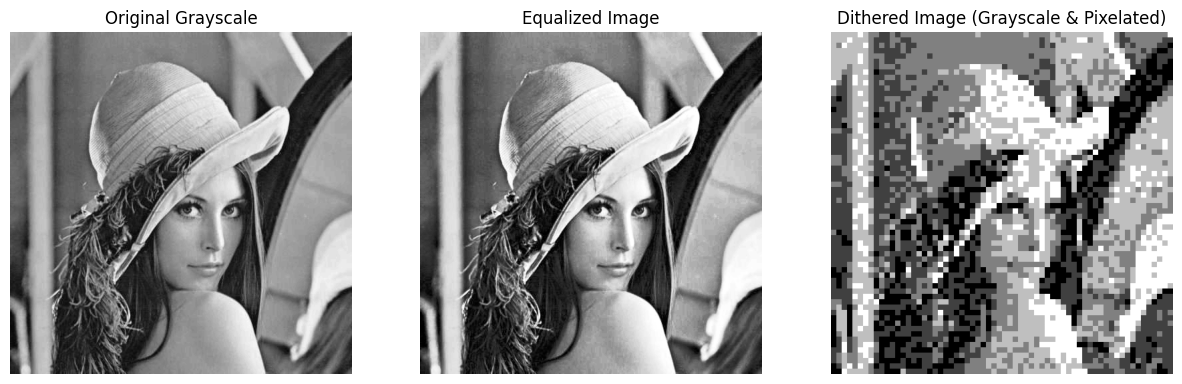

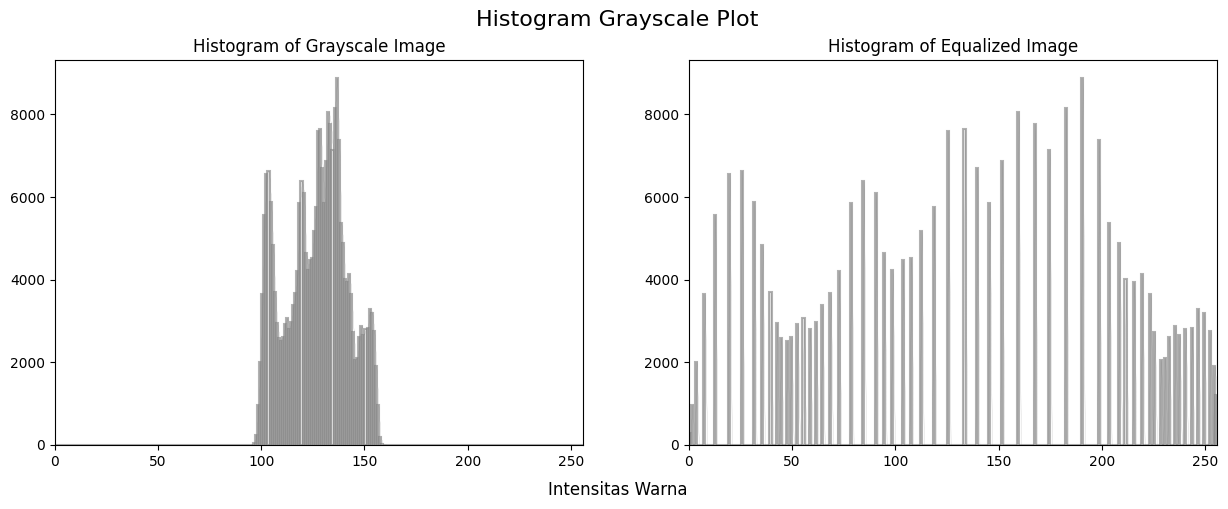

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image_path = '/content/drive/MyDrive/Images/lena_lc.jpg'
original_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Apply Histogram Equalization
equalized_image = cv.equalizeHist(original_image)

# Modified Floyd-Steinberg Dithering to retain grayscale values (not pure black and white)
def floyd_steinberg_dithering_grayscale(image):
    height, width = image.shape
    dithered = np.copy(image)

    for y in range(height):
        for x in range(width):
            old_pixel = dithered[y, x]
            new_pixel = np.round(old_pixel / 255.0) * 255  # Rounding to nearest level
            dithered[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x < width - 1:
                dithered[y, x + 1] = np.clip(dithered[y, x + 1] + quant_error * 7 / 16, 0, 255)
            if y < height - 1:
                dithered[y + 1, x] = np.clip(dithered[y + 1, x] + quant_error * 5 / 16, 0, 255)
                if x > 0:
                    dithered[y + 1, x - 1] = np.clip(dithered[y + 1, x - 1] + quant_error * 3 / 16, 0, 255)
                if x < width - 1:
                    dithered[y + 1, x + 1] = np.clip(dithered[y + 1, x + 1] + quant_error * 1 / 16, 0, 255)

    return dithered

# Apply the modified Floyd-Steinberg dithering to retain grayscale
dithered_image = floyd_steinberg_dithering_grayscale(equalized_image)

# Create a blocky (pixelated) effect for dithering
block_size = 8  # Size of the pixelation block
height, width = dithered_image.shape
dithered_blocked = cv.resize(cv.resize(dithered_image, (width // block_size, height // block_size), interpolation=cv.INTER_LINEAR), (width, height), interpolation=cv.INTER_NEAREST)

# Plot the original, equalized, and dithered images
plt.figure(figsize=(15, 5))

# Original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

# Equalized image
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Dithered and pixelated image (in grayscale)
plt.subplot(1, 3, 3)
plt.imshow(dithered_blocked, cmap='gray')  # Retain grayscale effect here
plt.title('Dithered Image (Grayscale & Pixelated)')
plt.axis('off')

plt.show()

# Plot histograms of the original and equalized images
plt.figure(figsize=(15, 5))

# Add title for the histograms
plt.suptitle('Histogram Grayscale Plot', fontsize=16)

# Histogram for the original grayscale image
plt.subplot(1, 2, 1)
plt.hist(original_image.ravel(), bins=256, range=[0, 256], color='lightgray', alpha=0.6, edgecolor='gray', linewidth=1.5)
plt.title('Histogram of Grayscale Image')
plt.xlim([0, 256])  # Set limits to ensure visibility of all values

# Plotting the histogram as a line on top of the histogram bars
counts, bin_edges = np.histogram(original_image.ravel(), bins=256, range=[0, 256])
plt.plot(bin_edges[1:], counts, color='gray', linewidth=0.1)  # Add thicker line

# Histogram for the equalized image
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='lightgray', alpha=0.6, edgecolor='gray', linewidth=1.5)
plt.title('Histogram of Equalized Image')
plt.xlim([0, 256])  # Set limits to ensure visibility of all values

# Plotting the histogram as a line on top of the histogram bars
counts, bin_edges = np.histogram(equalized_image.ravel(), bins=256, range=[0, 256])
plt.plot(bin_edges[1:], counts, color='gray', linewidth=0.1)  # Add thicker line

plt.figtext(0.5, 0.01, 'Intensitas Warna', ha='center', fontsize=12)

plt.show()

# End